<h1><b>Market analysis of superstore with Time series</h1>



In [1]:
import warnings
import itertools
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
warnings.filterwarnings("ignore")

In [2]:

df = pd.read_csv('Superstore.csv',parse_dates=['Order Date'])
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<h3>1.Reindex Order Date using time series only for furniture sales data.</h3>

In [3]:
furniture = df.loc[df['Category']=='Furniture']

In [4]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [6]:
cols=['Row ID', 'Order ID', 'Ship Date', 'Ship Mode','Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State','Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category','Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True)

In [7]:
furniture

,Order Date,Sales
0,2016-08-11,261.9600
1,2016-08-11,731.9400
3,2015-11-10,957.5775
5,2014-09-06,48.8600
10,2014-09-06,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-05-12,13.4000
9980,2015-06-09,85.9800
9989,2014-01-21,25.2480


In [8]:
furniture=furniture.sort_values('Order Date')

In [9]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture=furniture.set_index('Order Date')

In [11]:
furniture

,Sales
Order Date,
2014-01-03,362.250
2014-01-03,63.552
2014-01-03,376.509
2014-01-03,634.116
2014-01-03,457.568
...,...
2017-12-29,68.460
2017-12-29,101.120
2017-12-29,393.568


<h3>2.Plot a graph of furniture sales using OrderDates monthly wise.</h3>

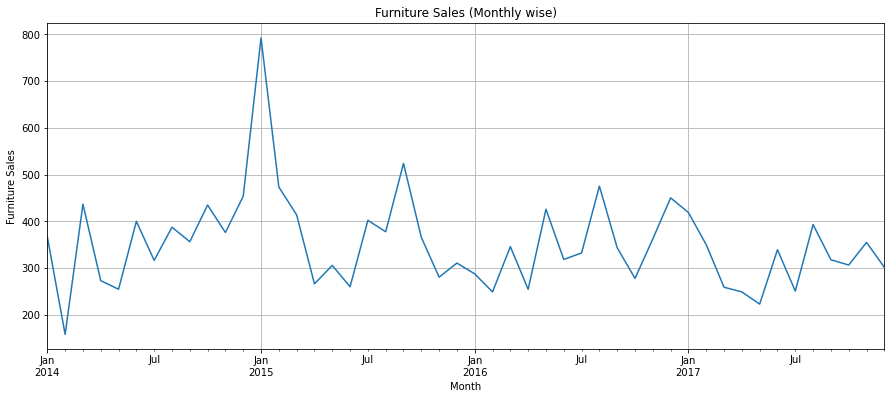

In [12]:
y = furniture['Sales'].resample('MS').mean()
ay=y.plot(grid=True,figsize=(15,6))
ay.set_xlabel('Month')
ay.set_ylabel('Furniture Sales')
plt.title('Furniture Sales (Monthly wise)')
plt.show()

<h3>3.Plot a graph of furniture sales Using OrderDates quratrly wise.</h3>

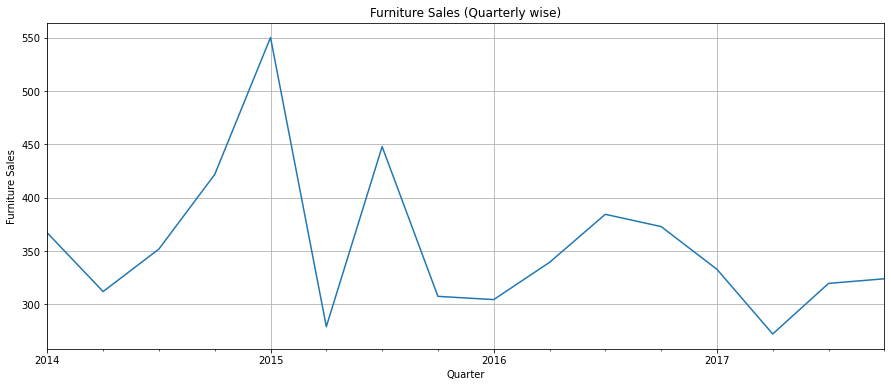

In [13]:
q = furniture['Sales'].resample('Q').mean()
ay=q.plot(grid=True,figsize=(15,6))
ay.set_xlabel('Quarter')
ay.set_ylabel('Furniture Sales')
plt.title('Furniture Sales (Quarterly wise)')
plt.show()

<h3>4.Plot a graph of furniture salesusing OrderDate yearly.</h3>

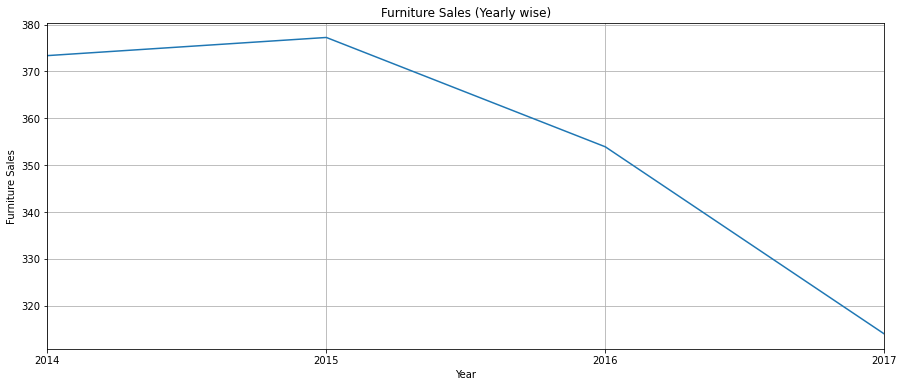

In [14]:
m = furniture['Sales'].resample('Y').mean()
ax=m.plot(grid=True,figsize=(15,6))
ax.set_xlabel('Year')
ax.set_ylabel('Furniture Sales')
plt.title('Furniture Sales (Yearly wise)')
plt.show()

<h3>5.Using additive model and seasonal_decompose plot a graph.</h3>

In [15]:
from pylab import rcParams

In [16]:
decomposition=sm.tsa.seasonal_decompose(y,model='additive')

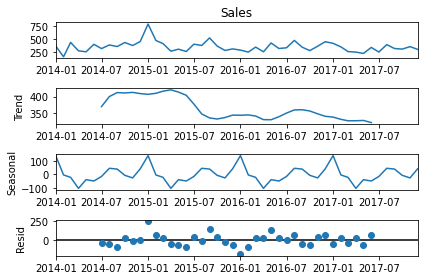

In [17]:

fig=decomposition.plot()

plt.show()

In [18]:
qfurniture = df.loc[df['Category']=='Furniture']
cols=['Row ID', 'Order ID', 'Ship Date', 'Ship Mode','Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State','Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category','Product Name','Sales' , 'Discount', 'Profit']
qfurniture.drop(cols,axis=1,inplace=True)
qfurniture=qfurniture.sort_values('Order Date')
qfurniture=qfurniture.set_index('Order Date')
qfurniture

,Quantity
Order Date,
2014-01-03,6
2014-01-03,6
2014-01-03,3
2014-01-03,6
2014-01-03,2
...,...
2017-12-29,2
2017-12-29,8
2017-12-29,4


<h3>6.Plot a graph for furniture quantity using order date(monthly).</h3>

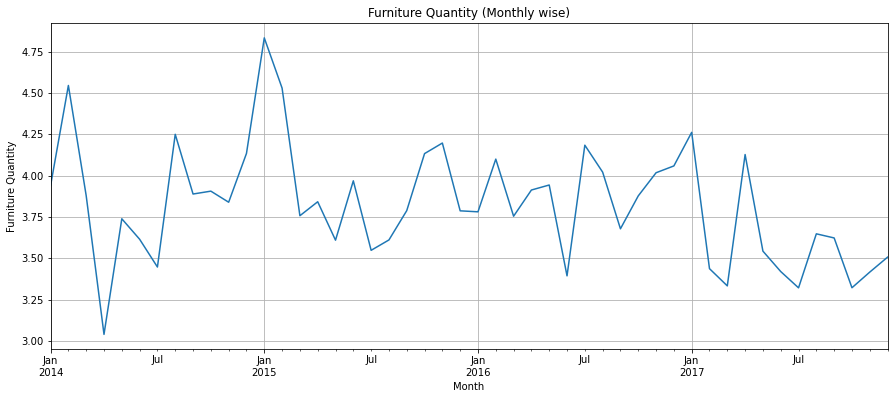

In [19]:
qmonth = qfurniture['Quantity'].resample('MS').mean()
ax=qmonth.plot(grid=True,figsize=(15,6))
ax.set_xlabel('Month')
ax.set_ylabel('Furniture Quantity')
plt.title('Furniture Quantity (Monthly wise)')
plt.show()

<h3>7.Plot a graph for furniture quantity using order date(quarterly).</h3>

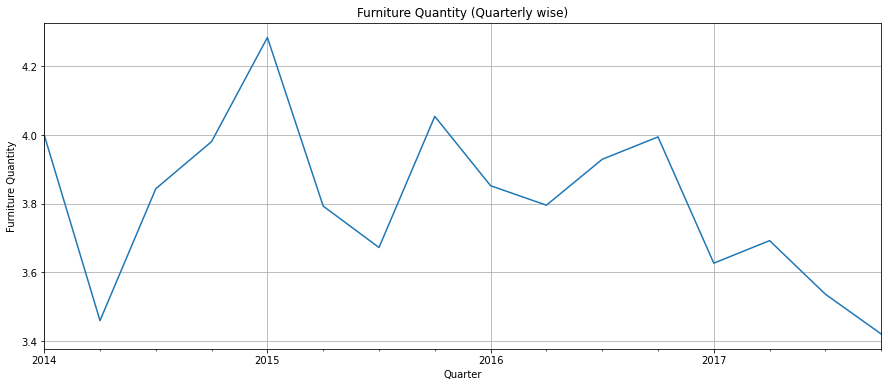

In [20]:
quarter = qfurniture['Quantity'].resample('QS').mean()
ax=quarter.plot(grid=True,figsize=(15,6))
ax.set_xlabel('Quarter')
ax.set_ylabel('Furniture Quantity')
plt.title('Furniture Quantity (Quarterly wise)')
plt.show()

<h3>8.Plot a graph for furniture quantity using order date(yearly).</h3>

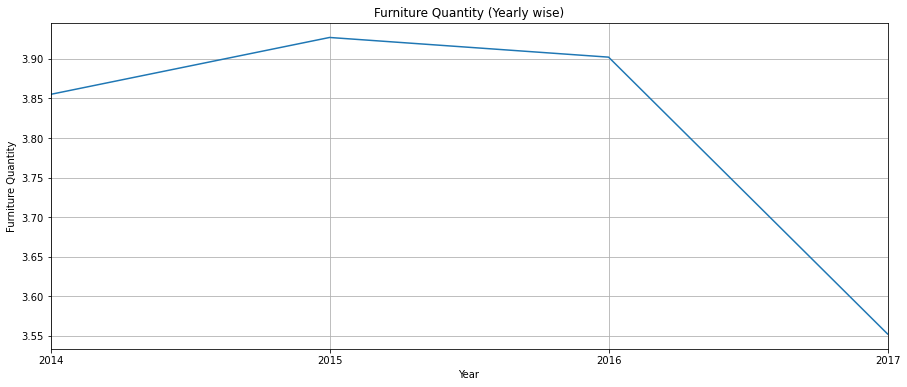

In [21]:
qyear = qfurniture['Quantity'].resample('Y').mean()
ax=qyear.plot(grid=True,figsize=(15,6))
ax.set_xlabel('Year')
ax.set_ylabel('Furniture Quantity')
plt.title('Furniture Quantity (Yearly wise)')
plt.show()

<h3>9.Plot a graph for sales according to catogery.</h3>

In [22]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
technology = df.loc[df['Category'] == 'Technology']
furniture.shape, office.shape, technology.shape

((2121, 21), (6026, 21), (1847, 21))

In [23]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
technology.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
technology = technology.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
technology = technology.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()



In [24]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales': y_technology.values})
store = furniture.merge(office, on='Order Date', how='outer').merge(technology, on='Order Date', how='outer')
store.rename(columns={'Sales_x': 'Furniture Sales', 'Sales_y': 'Office Sales', 'Sales': 'Technology Sales'}, inplace=True)
store.head()

,Order Date,Furniture Sales,Office Sales,Technology Sales
0,2014-01-01,864.733571,444.576632,700.040000
1,2014-02-01,248.475714,218.499545,476.676000
2,2014-03-01,800.669889,296.721840,2060.737625
3,2014-04-01,525.167692,352.387750,942.553000
4,2014-05-01,390.457467,703.816174,399.747368


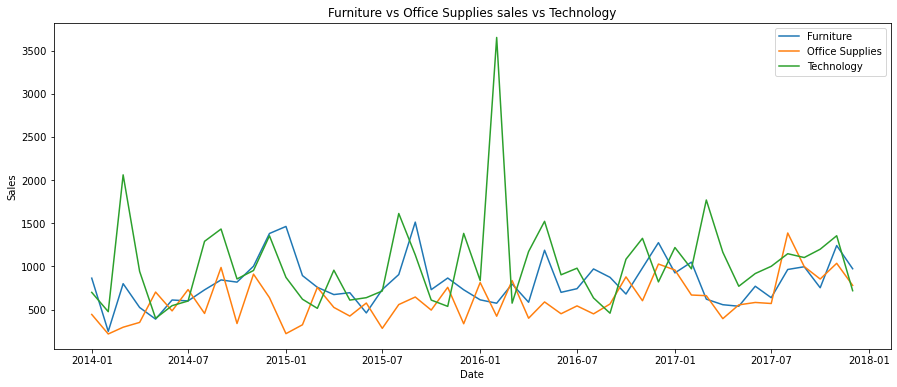

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['Furniture Sales'], label='Furniture')
plt.plot(store['Order Date'], store['Office Sales'], label='Office Supplies')
plt.plot(store['Order Date'], store['Technology Sales'], label='Technology')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales vs Technology')
plt.legend()
plt.show()

<h3>10.Plot a graph for sales according to sub-catogery.</h3>

In [26]:
substore = set(df['Sub-Category'])
print('Number of Sub-Categories',len(substore))
substore

Number of Sub-Categories 17


{'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables'}

In [27]:
accessories = df.loc[df['Sub-Category'] == 'Accessories']
appliances = df.loc[df['Sub-Category'] == 'Appliances']
art = df.loc[df['Sub-Category'] == 'Art']
binders = df.loc[df['Sub-Category'] == 'Binders']
bookcases = df.loc[df['Sub-Category'] == 'Bookcases']
chairs = df.loc[df['Sub-Category'] == 'Chairs']
copiers = df.loc[df['Sub-Category'] == 'Copiers']
envelopes = df.loc[df['Sub-Category'] == 'Envelopes']
fasteners = df.loc[df['Sub-Category'] == 'Fasteners']
furnishings = df.loc[df['Sub-Category'] == 'Furnishings']
labels = df.loc[df['Sub-Category'] == 'Labels']
machines = df.loc[df['Sub-Category'] == 'Machines']
paper = df.loc[df['Sub-Category'] == 'Paper']
phones = df.loc[df['Sub-Category'] == 'Phones']
storage = df.loc[df['Sub-Category'] == 'Storage']
supplies = df.loc[df['Sub-Category'] == 'Supplies']
tables = df.loc[df['Sub-Category'] == 'Tables']

In [28]:
accessories.shape,appliances.shape,art.shape,binders.shape,bookcases.shape,chairs.shape,copiers.shape,envelopes.shape,fasteners.shape,furnishings.shape,labels.shape,machines.shape,paper.shape,phones.shape,storage.shape,supplies.shape,tables.shape

((775, 21),
 (466, 21),
 (796, 21),
 (1523, 21),
 (228, 21),
 (617, 21),
 (68, 21),
 (254, 21),
 (217, 21),
 (957, 21),
 (364, 21),
 (115, 21),
 (1370, 21),
 (889, 21),
 (846, 21),
 (190, 21),
 (319, 21))

In [29]:
cols=['Row ID', 'Order ID','Ship Date', 'Ship Mode','Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State','Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category','Product Name', 'Quantity', 'Discount', 'Profit']
accessories.drop(cols,axis=1,inplace=True)
appliances.drop(cols,axis=1,inplace=True)
art.drop(cols,axis=1,inplace=True)
binders.drop(cols,axis=1,inplace=True)
bookcases.drop(cols,axis=1,inplace=True)
chairs.drop(cols,axis=1,inplace=True)
copiers.drop(cols,axis=1,inplace=True)
envelopes.drop(cols,axis=1,inplace=True)
fasteners.drop(cols,axis=1,inplace=True)
furnishings.drop(cols,axis=1,inplace=True)
labels.drop(cols,axis=1,inplace=True)
machines.drop(cols,axis=1,inplace=True)
paper.drop(cols,axis=1,inplace=True)
phones.drop(cols,axis=1,inplace=True)
storage.drop(cols,axis=1,inplace=True)
supplies.drop(cols,axis=1,inplace=True)
tables.drop(cols,axis=1,inplace=True)

In [30]:
sub_features=['accessories',
 'appliances',
 'art',
 'binders',
 'bookcases',
 'chairs',
 'copiers',
 'envelopes',
 'fasteners',
 'furnishings',
 'labels',
 'machines',
 'paper',
 'phones',
 'storage',
 'supplies',
 'tables']

In [31]:
submean=[]
submean.extend([accessories['Sales'].mean(),appliances['Sales'].mean(),art['Sales'].mean(),binders['Sales'].mean(),bookcases['Sales'].mean(),chairs['Sales'].mean(),copiers['Sales'].mean(),envelopes['Sales'].mean(),fasteners['Sales'].mean(),furnishings['Sales'].mean(),labels['Sales'].mean(),machines['Sales'].mean(),paper['Sales'].mean(),phones['Sales'].mean(),storage['Sales'].mean(),supplies['Sales'].mean(),tables['Sales'].mean()])
submean

[215.97460387096777,
 230.75571030042917,
 34.068834170854274,
 133.56056007879187,
 503.8596328947368,
 532.3324197730956,
 2198.9416176470586,
 64.86772440944881,
 13.936774193548386,
 95.82566771159874,
 34.303054945054946,
 1645.5533130434785,
 57.28409197080291,
 371.21153430821147,
 264.5905531914894,
 245.65019999999996,
 648.7947711598746]

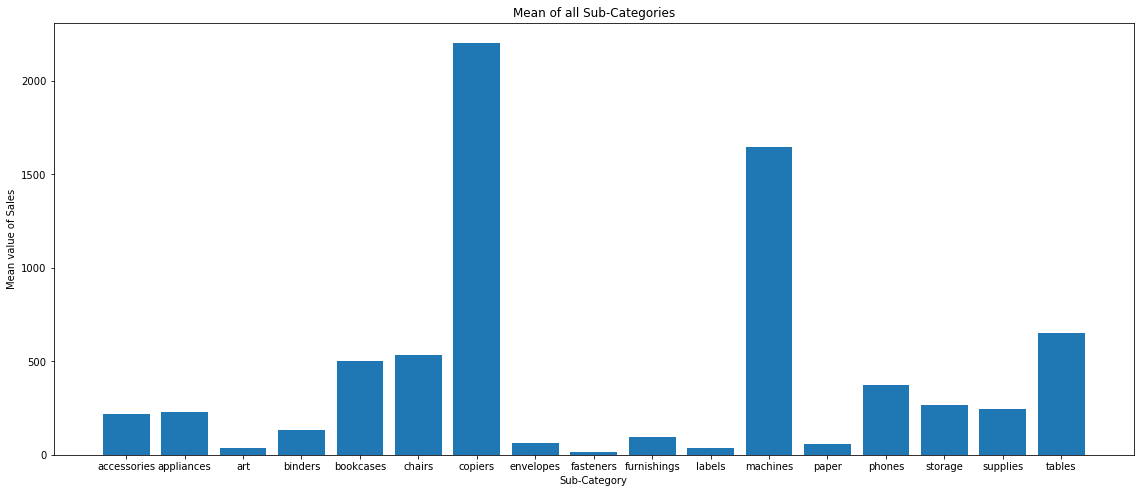

In [32]:
fig=plt.figure(figsize=(15,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(sub_features,submean)
plt.title('Mean of all Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Mean value of Sales')
plt.show()

In [33]:
accessories=accessories.sort_values('Order Date')
appliances=appliances.sort_values('Order Date')
art=art.sort_values('Order Date')
binders=binders.sort_values('Order Date')
bookcases=bookcases.sort_values('Order Date')
chairs=chairs.sort_values('Order Date')
copiers=copiers.sort_values('Order Date')
envelopes=envelopes.sort_values('Order Date')
fasteners=fasteners.sort_values('Order Date')
furnishings=furnishings.sort_values('Order Date')
labels=labels.sort_values('Order Date')
machines=machines.sort_values('Order Date')
paper=paper.sort_values('Order Date')
phones=phones.sort_values('Order Date')
storage=storage.sort_values('Order Date')
supplies=supplies.sort_values('Order Date')
tables=tables.sort_values('Order Date')

In [34]:
accessories = accessories.groupby('Order Date')['Sales'].sum().reset_index()
appliances = appliances.groupby('Order Date')['Sales'].sum().reset_index()
art = art.groupby('Order Date')['Sales'].sum().reset_index()
binders = binders.groupby('Order Date')['Sales'].sum().reset_index()
bookcases = bookcases.groupby('Order Date')['Sales'].sum().reset_index()
chairs = chairs.groupby('Order Date')['Sales'].sum().reset_index()
copiers =copiers.groupby('Order Date')['Sales'].sum().reset_index()
envelopes = envelopes.groupby('Order Date')['Sales'].sum().reset_index()
fasteners = fasteners.groupby('Order Date')['Sales'].sum().reset_index()
furnishings = furnishings.groupby('Order Date')['Sales'].sum().reset_index()
labels = labels.groupby('Order Date')['Sales'].sum().reset_index()
machines = machines.groupby('Order Date')['Sales'].sum().reset_index()
paper = paper.groupby('Order Date')['Sales'].sum().reset_index()
phones = phones.groupby('Order Date')['Sales'].sum().reset_index()
storage = storage.groupby('Order Date')['Sales'].sum().reset_index()
supplies = supplies.groupby('Order Date')['Sales'].sum().reset_index()
tables = tables.groupby('Order Date')['Sales'].sum().reset_index()

In [35]:
accessories = accessories.set_index('Order Date')
appliances = appliances.set_index('Order Date')
art = art.set_index('Order Date')
binders = binders.set_index('Order Date')
bookcases = bookcases.set_index('Order Date')
chairs = chairs.set_index('Order Date')
copiers = copiers.set_index('Order Date')
envelopes = envelopes.set_index('Order Date')
fasteners = fasteners.set_index('Order Date')
furnishings = furnishings.set_index('Order Date')
labels = labels.set_index('Order Date')
machines = machines.set_index('Order Date')
paper = paper.set_index('Order Date')
phones = phones.set_index('Order Date')
storage = storage.set_index('Order Date')
supplies = supplies.set_index('Order Date')
tables = tables.set_index('Order Date')

In [36]:
y_accessories = accessories['Sales'].resample('MS').mean()
y_appliances = appliances['Sales'].resample('MS').mean()
y_art = art['Sales'].resample('MS').mean()
y_binders = binders['Sales'].resample('MS').mean()
y_bookcases = bookcases['Sales'].resample('MS').mean()
y_chairs = chairs['Sales'].resample('MS').mean()
y_copiers = copiers['Sales'].resample('MS').mean()
y_envelopes = envelopes['Sales'].resample('MS').mean()
y_fasteners = fasteners['Sales'].resample('MS').mean()
y_furnishings = furnishings['Sales'].resample('MS').mean()
y_labels = labels['Sales'].resample('MS').mean()
y_machines = machines['Sales'].resample('MS').mean()
y_paper = paper['Sales'].resample('MS').mean()
y_phones = phones['Sales'].resample('MS').mean()
y_storage = storage['Sales'].resample('MS').mean()
y_supplies = supplies['Sales'].resample('MS').mean()
y_tables = tables['Sales'].resample('MS').mean()

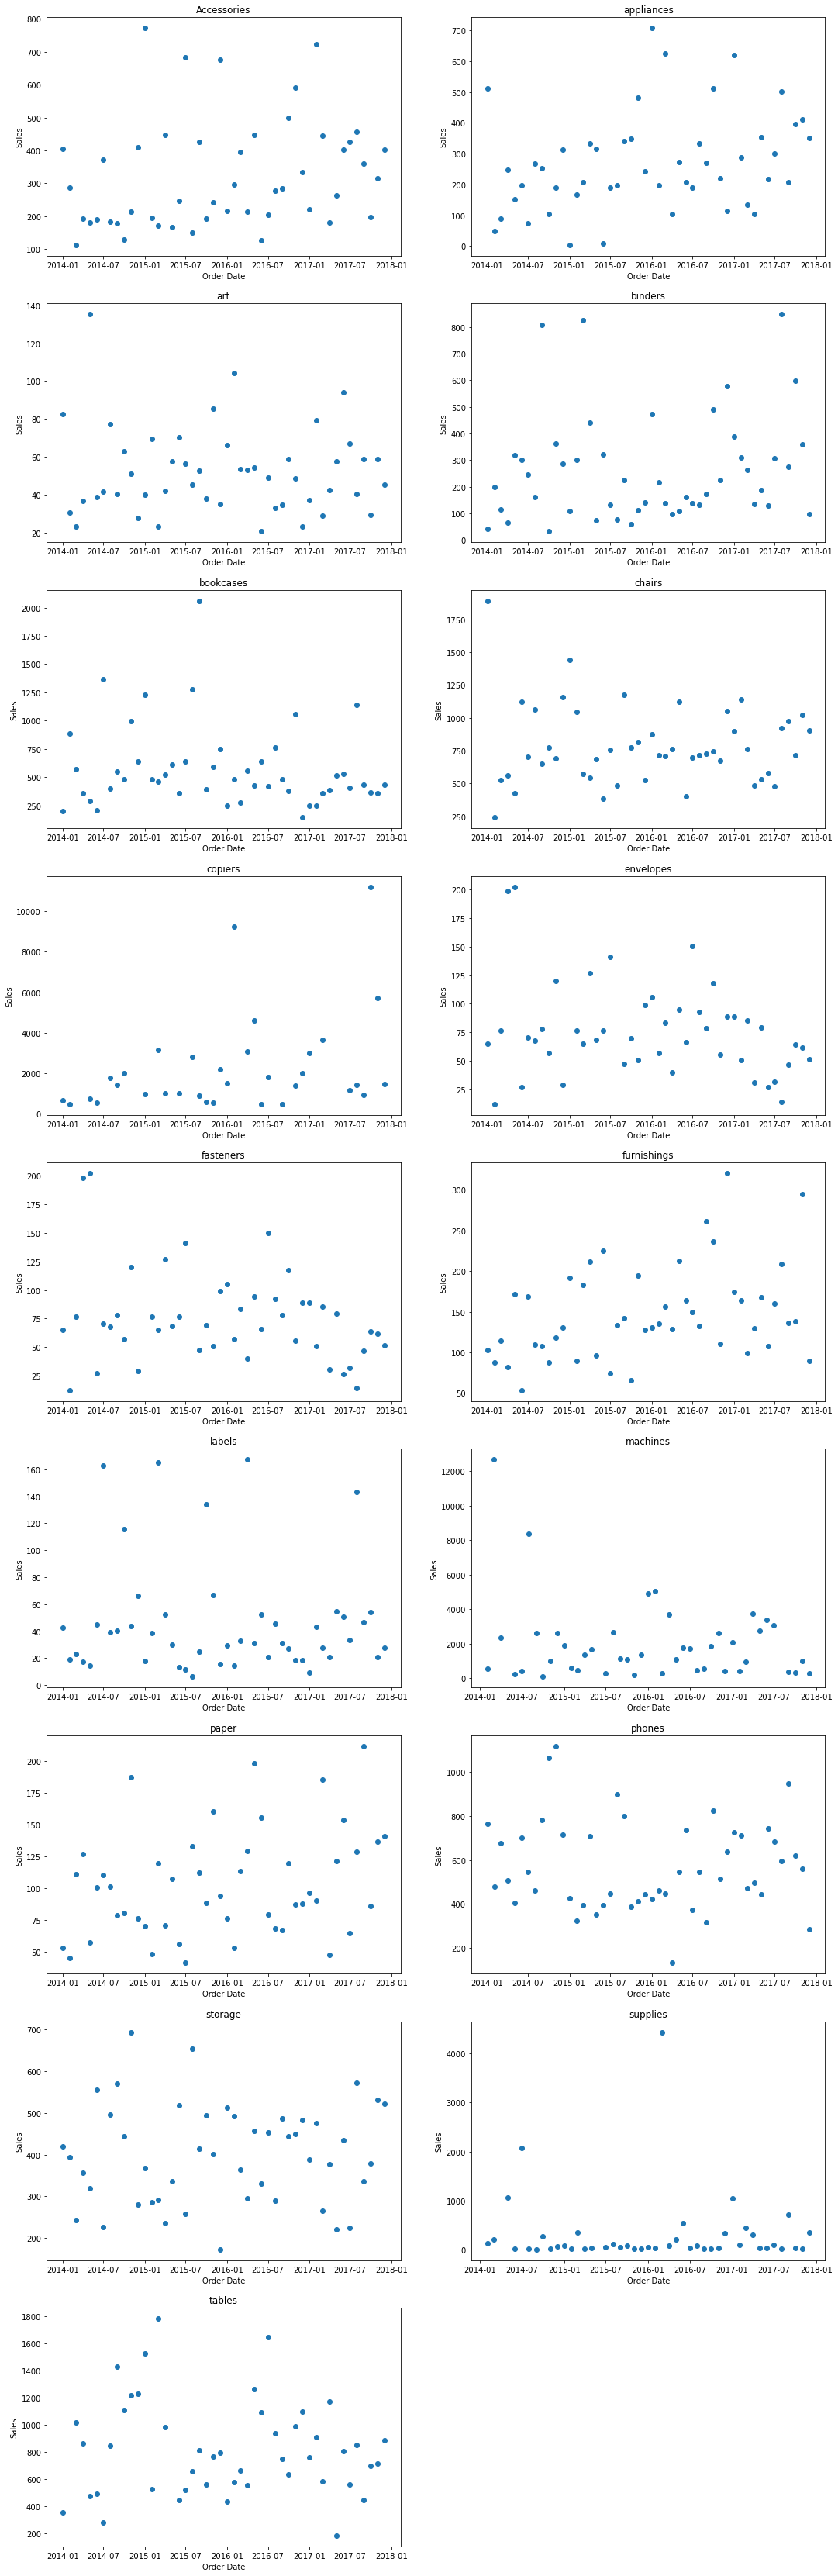

In [37]:
fig,axes = plt.subplots(9,2,figsize=(18,60))
axes[0][0].scatter(y_accessories.index,y_accessories)
axes[0][0].set_title('Accessories')
axes[0][1].scatter(y_appliances.index,y_appliances)
axes[0][1].set_title('appliances')
axes[1][0].scatter(y_art.index,y_art)
axes[1][0].set_title('art')
axes[1][1].scatter(y_binders.index,y_binders)
axes[1][1].set_title('binders')
axes[2][0].scatter(y_bookcases.index,y_bookcases)
axes[2][0].set_title('bookcases')
axes[2][1].scatter(y_chairs.index,y_chairs)
axes[2][1].set_title('chairs')
axes[3][0].scatter(y_copiers.index,y_copiers)
axes[3][0].set_title('copiers')
axes[3][1].scatter(y_envelopes.index,y_envelopes)
axes[3][1].set_title('envelopes')
axes[4][0].scatter(y_fasteners.index,y_envelopes)
axes[4][0].set_title('fasteners')
axes[4][1].scatter(y_furnishings.index,y_furnishings)
axes[4][1].set_title('furnishings')
axes[5][0].scatter(y_labels.index,y_labels)
axes[5][0].set_title('labels')
axes[5][1].scatter(y_machines.index,y_machines)
axes[5][1].set_title('machines')
axes[6][0].scatter(y_paper.index,y_paper)
axes[6][0].set_title('paper')
axes[6][1].scatter(y_phones.index,y_phones)
axes[6][1].set_title('phones')
axes[7][0].scatter(y_storage.index,y_storage)
axes[7][0].set_title('storage')
axes[7][1].scatter(y_supplies.index,y_supplies)
axes[7][1].set_title('supplies')
axes[8][0].scatter(y_tables.index,y_tables)
axes[8][0].set_title('tables')


for i in range(9):
    for j in range(2):
        axes[i][j].set_ylabel('Sales')
        axes[i][j].set_xlabel('Order Date')
        
        
axes[8][1].clear()
fig.delaxes(axes[8][1])

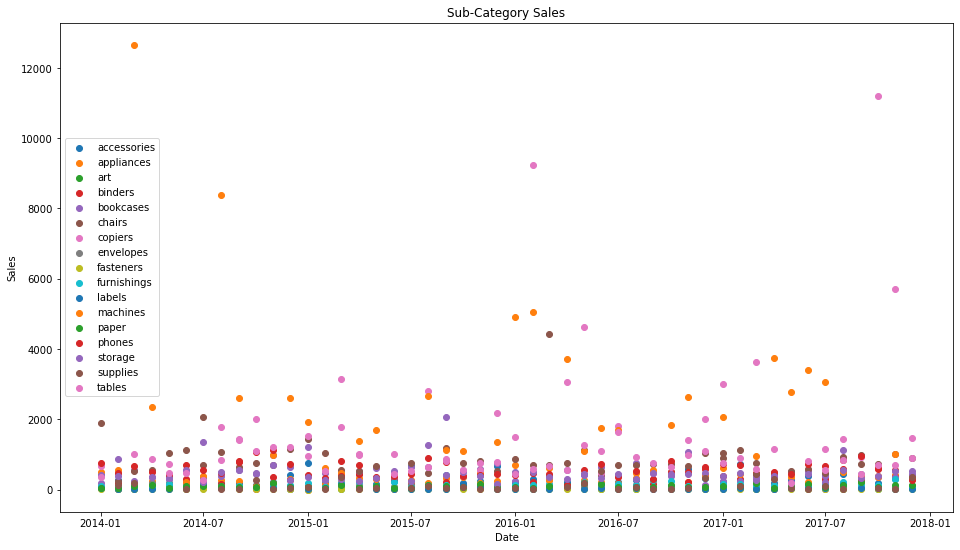

In [38]:
plt.subplots(figsize=(16,9))
plt.scatter(y_accessories.index,y_accessories,label='accessories')
plt.scatter(y_appliances.index,y_appliances,label='appliances')
plt.scatter(y_art.index,y_art,label='art')
plt.scatter(y_binders.index,y_binders,label='binders')
plt.scatter(y_bookcases.index,y_bookcases,label='bookcases')
plt.scatter(y_chairs.index,y_chairs,label='chairs')
plt.scatter(y_copiers.index,y_copiers,label='copiers')
plt.scatter(y_envelopes.index,y_envelopes,label='envelopes')
plt.scatter(y_fasteners.index,y_fasteners,label='fasteners')
plt.scatter(y_furnishings.index,y_furnishings,label='furnishings')
plt.scatter(y_labels.index,y_labels,label='labels')
plt.scatter(y_machines.index,y_machines,label='machines')
plt.scatter(y_paper.index,y_paper,label='paper')
plt.scatter(y_phones.index,y_phones,label='phones')
plt.scatter(y_storage.index,y_storage,label='storage')
plt.scatter(y_supplies.index,y_supplies,label='supplies')
plt.scatter(y_tables.index,y_tables,label='tables')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sub-Category Sales')
plt.legend()
plt.show()